## Wearable Tech: Week 3 Assignment

### Step 1

In [29]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates

from datetime import datetime
import plotly.graph_objects as go

df = pd.read_csv("../Data/WBBtotal.csv", index_col =["Timestamp"], parse_dates=["Timestamp"])
df.head()

,Seconds,Velocity,Acceleration,Odometer,Latitude,Longitude,Heart Rate,Player Load,AthleteID
Timestamp,,,,,,,,,
2019-01-08 17:39:42,0.0,0,0,0,0,0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.1,0,0,0,0,0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.2,0,0,0,0,0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.3,0,0,0,0,0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.4,0,0,0,0,0,83,0.0,Athlete 1


### Step 2

In [31]:
columns_to_keep = ['Seconds','Heart Rate', 'Player Load', 'AthleteID']

df_wbb = df[columns_to_keep]
df_wbb

,Seconds,Heart Rate,Player Load,AthleteID
Timestamp,,,,
2019-01-08 17:39:42,0.0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.1,83,0.0,Athlete 1
2019-01-08 17:39:42,0.2,83,0.0,Athlete 1
2019-01-08 17:39:42,0.3,83,0.0,Athlete 1
2019-01-08 17:39:42,0.4,83,0.0,Athlete 1
...,...,...,...,...
2019-03-08 16:47:03,11484.4,101,1001.5,Athlete 5
2019-03-08 16:47:03,11484.5,101,1001.5,Athlete 5
2019-03-08 16:47:03,11484.6,101,1001.5,Athlete 5


In [32]:
# Get unique game days from within the dataset -- it might run slowly -- in which case it is not necessary
df_wbb.index.map(pd.Timestamp.date).unique()

Index([2019-01-08, 2019-03-09, 2019-03-08], dtype='object', name='Timestamp')

In [33]:
# Get unique Athlete IDs
uniqueValues = (df_wbb['AthleteID'].unique())
print(uniqueValues)

['Athlete 1' 'Athlete 12' 'Athlete 10' 'Athlete 3' 'Athlete 13'
 'Athlete 2' 'Athlete 11' 'Athlete 6' 'Athlete 4' 'Athlete 9' 'Athlete 8'
 'Athlete 7' 'Athlete 5']


In [34]:
print(df_wbb.columns)

Index(['Seconds', 'Heart Rate', 'Player Load', 'AthleteID'], dtype='object')


### Step 3

In [35]:
# keep only 3/9/2019
Game_3_9_df = df_wbb.loc['2019-03-09']
Game_3_9_df

,Seconds,Heart Rate,Player Load,AthleteID
Timestamp,,,,
2019-03-09 15:57:49,0.0,0,0.0,Athlete 10
2019-03-09 15:57:49,0.1,0,0.0,Athlete 10
2019-03-09 15:57:49,0.2,0,0.0,Athlete 10
2019-03-09 15:57:49,0.3,0,0.0,Athlete 10
2019-03-09 15:57:49,0.4,0,0.0,Athlete 10
...,...,...,...,...
2019-03-09 19:08:14,11348.4,108,470.6,Athlete 8
2019-03-09 19:08:14,11348.5,106,470.6,Athlete 8
2019-03-09 19:08:14,11348.6,106,470.6,Athlete 8


### Step 4

In [37]:
# determine the total number of HR data points which recorderd a value of 0
(Game_3_9_df == 0).sum(axis=0)  # we are just capturing the number of cells with a zero in them for each column in the entire team dataframe


Seconds           13
Heart Rate     69452
Player Load      391
AthleteID          0
dtype: int64

### Step 5

In [38]:
# determine the % of missing HR data for each individual athlete 
# The following will look at each athelete and, for each of our columns of seconds, heart rate, and player load
# we will generate the min, average, and max values
Game_3_9_df.groupby('AthleteID').agg([min,np.average,max,len])

Seconds                             Heart Rate                   \
               min  average      max       len        min     average  max   
AthleteID                                                                    
Athlete 1      0.0  5668.90  11337.8  113379.0          0  139.458057  212   
Athlete 10     0.0  5713.00  11426.0  114261.0          0  131.119358  234   
Athlete 11     0.0  5673.40  11346.8  113469.0          0  100.779728  216   
Athlete 12     0.0  5684.40  11368.8  113689.0          0   86.448768  195   
Athlete 13     0.0  5667.25  11334.5  113346.0          0  101.914554  210   
Athlete 2      0.0  5691.40  11382.8  113829.0          0  115.228237  213   
Athlete 3      0.0  5675.90  11351.8  113519.0          0   88.301756  210   
Athlete 4      0.0  5687.40  11374.8  113749.0          0   82.185734  181   
Athlete 5      0.0  5681.40  11362.8  113629.0          0  126.436948  225   
Athlete 6      0.0  5678.90  11357.8  113579.0          0  103.295891  185   
Athlete 7      0.0  5667.70  11335.4  113355.0          0  138.513969  206   
Athlete 8      0.0  5674.40  11348.8  113489.0          0  109.560371  189   
Athlete 9      0.0  5690.90  11381.8  113819.0          0  136.235760  209   

                   Player Load                                
               len         min     average     max       len  
AthleteID                                                     
Athlete 1   113379         0.0  434.664178   919.4  113379.0  
Athlete 10  114261         0.0  495.154418  1038.8  114261.0  
Athlete 11  113469         0.0  225.647698   342.1  113469.0  
Athlete 12  113689         0.0  208.703028   355.9  113689.0  
Athlete 13  113346         0.0  214.251097   344.8  113346.0  
Athlete 2   113829         0.0  290.104655   549.3  113829.0  
Athlete 3   113519         0.0  222.107836   337.3  113519.0  
Athlete 4   113749         0.0  261.539314   422.6  113749.0  
Athlete 5   113629         0.0  385.821626   790.5  113629.0  
Athlete 6   113579         0.0  167.869622   265.9  113579.0  
Athlete 7   113355         0.0  436.684234   904.5  113355.0  
Athlete 8   113489         0.0  259.453679   470.6  113489.0  
Athlete 9   113819         0.0  393.610484   890.8  113819.0

In [40]:
%%capture
Game_3_9_df.loc[Game_3_9_df['Heart Rate'] ==0, 'Heart Rate'] = np.nan

In [41]:
DataCount= Game_3_9_df.groupby('AthleteID')['Heart Rate', 'Player Load'].count()
DataCount.sort_values(by='Heart Rate')

,Heart Rate,Player Load
AthleteID,,
Athlete 10,104229,114261
Athlete 11,105176,113469
Athlete 13,105498,113346
Athlete 3,106787,113519
Athlete 9,108116,113819
Athlete 5,108154,113629
Athlete 6,108862,113579
Athlete 12,109057,113689
Athlete 2,109071,113829


In [42]:
DataCount['Missing_HR_values']= (DataCount['Player Load']- DataCount['Heart Rate'])
DataCount['%_HR_missing']= DataCount['Missing_HR_values']/ DataCount['Player Load']*100
DataCount.sort_values(by='Player Load')

,Heart Rate,Player Load,Missing_HR_values,%_HR_missing
AthleteID,,,,
Athlete 13,105498,113346,7848,6.923932
Athlete 7,111604,113355,1751,1.544705
Athlete 1,110378,113379,3001,2.646875
Athlete 11,105176,113469,8293,7.308604
Athlete 8,109899,113489,3590,3.163302
Athlete 3,106787,113519,6732,5.930285
Athlete 6,108862,113579,4717,4.153056
Athlete 5,108154,113629,5475,4.818312
Athlete 12,109057,113689,4632,4.074273


### Step 6


AthleteID
Athlete 10    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 13    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

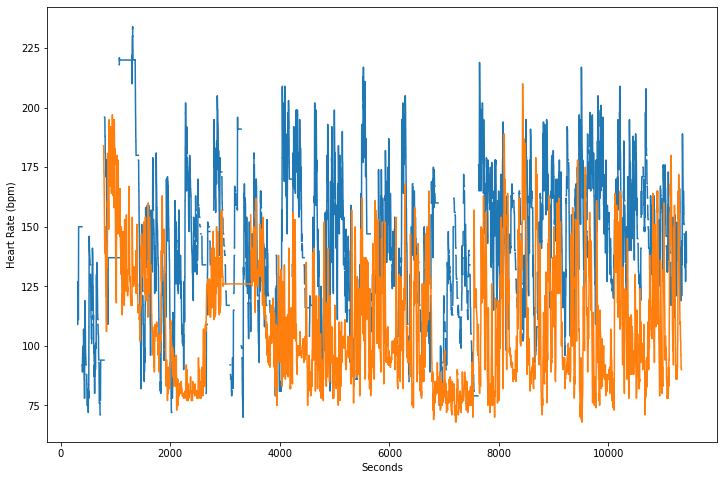

In [43]:
(df1.query("AthleteID == 'Athlete 10' or AthleteID == 'Athlete 13'")
    .groupby("AthleteID")
    .plot(x="Seconds",y="Heart Rate", ax=plt.gca(), ylabel="Heart Rate (bpm)", figsize=(12,8), legend=False))


### Step 7

<AxesSubplot:xlabel='Seconds'>

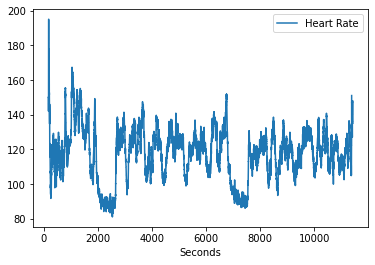

In [46]:
#plot average heart rate across session 
Team_Mean_HR2 = Game_3_9_df.groupby(['Seconds'])[['Heart Rate']].mean()
Team_Mean_HR2.plot(y='Heart Rate')


In [53]:
Rank_Mean_HR= Game_3_9_df.groupby(['AthleteID'])[['Heart Rate']].mean()
Rank_Mean_HR

,Heart Rate
AthleteID,
Athlete 1,143.249696
Athlete 10,143.739545
Athlete 11,108.726088
Athlete 12,90.120524
Athlete 13,109.495981
Athlete 2,120.254834
Athlete 3,93.868420
Athlete 4,84.351072
Athlete 5,132.837472


### Step 8


In [54]:
# caluculate TRIMP value use max heart rate 200 min 60
t= 12000/60

HRmax=200
HRrest= 60

FHRR= (Rank_Mean_HR['Heart Rate']- HRrest)/ (HRmax-HRrest)

In [55]:
kval= (np.exp(1.67* FHRR))
print(FHRR)
TRIMP= t * FHRR * kval

AthleteID
Athlete 1     0.594641
Athlete 10    0.598140
Athlete 11    0.348043
Athlete 12    0.215147
Athlete 13    0.353543
Athlete 2     0.430392
Athlete 3     0.241917
Athlete 4     0.173936
Athlete 5     0.520268
Athlete 6     0.341227
Athlete 7     0.576337
Athlete 8     0.379566
Athlete 9     0.595872
Name: Heart Rate, dtype: float64


### Step 9

In [56]:
InternalLoads=pd.concat([TRIMP, Rank_Mean_HR], axis=1)
InternalLoads.columns=['TRIMP Values','MEAN HR Values']
print(InternalLoads)

            TRIMP Values  MEAN HR Values
AthleteID                               
Athlete 1     321.041173      143.249696
Athlete 10    324.822671      143.739545
Athlete 11    124.477146      108.726088
Athlete 12     61.631714       90.120524
Athlete 13    127.610514      109.495981
Athlete 2     176.621997      120.254834
Athlete 3      72.469069       93.868420
Athlete 4      46.512651       84.351072
Athlete 5     248.080302      132.837472
Athlete 6     120.657609      107.771711
Athlete 7     301.791750      140.687171
Athlete 8     143.089162      113.139310
Athlete 9     322.367890      143.422047


In [58]:
Rank_Max_PL = Game_3_9_df.groupby(['AthleteID'])[['Player Load']].max()
InternalLoads['Player Load']=Rank_Max_PL['Player Load']
print(InternalLoads)

            TRIMP Values  MEAN HR Values  Player Load
AthleteID                                            
Athlete 1     321.041173      143.249696        919.4
Athlete 10    324.822671      143.739545       1038.8
Athlete 11    124.477146      108.726088        342.1
Athlete 12     61.631714       90.120524        355.9
Athlete 13    127.610514      109.495981        344.8
Athlete 2     176.621997      120.254834        549.3
Athlete 3      72.469069       93.868420        337.3
Athlete 4      46.512651       84.351072        422.6
Athlete 5     248.080302      132.837472        790.5
Athlete 6     120.657609      107.771711        265.9
Athlete 7     301.791750      140.687171        904.5
Athlete 8     143.089162      113.139310        470.6
Athlete 9     322.367890      143.422047        890.8


In [59]:
InternalLoads.sort_values(by='TRIMP Values', ascending=False)

,TRIMP Values,MEAN HR Values,Player Load
AthleteID,,,
Athlete 10,324.822671,143.739545,1038.8
Athlete 9,322.367890,143.422047,890.8
Athlete 1,321.041173,143.249696,919.4
Athlete 7,301.791750,140.687171,904.5
Athlete 5,248.080302,132.837472,790.5
Athlete 2,176.621997,120.254834,549.3
Athlete 8,143.089162,113.139310,470.6
Athlete 13,127.610514,109.495981,344.8
Athlete 11,124.477146,108.726088,342.1
